#Week 6  *(PageRank)*



In [ ]:
import random as r
import networkx as nx
import matplotlib.pyplot as plt
import time 
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


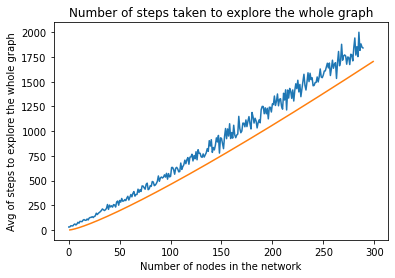

In [ ]:
def avg_relation(low_lim,up_lim,avg_over):
  ''' returns a list of average length of the random walk, 
  which explores all the nodes of 'avg_over' random graph,
  (probability of an edge>=0.5), ranging from size 'low_lim' to 'up_lim'.'''

  l=[]
  for num_of_nodes in range(low_lim,up_lim):
    l1=[]
    for i in range(avg_over):
      prob=r.uniform(0.5,1)
      G=g=nx.erdos_renyi_graph(num_of_nodes,prob)
      count=random_walk(G)
      l1+=[count]
    l+=[np.average(l1)]
    #print(num_of_nodes,l[-1])
  return l
  
def random_walk(g):
  '''returns the length of the random walk, which explores
  all the nodes of graph 'g'.
  '''
  node=r.randint(0,len(g.nodes())-1)
  vis,c=[],0
  while len(vis)!=len(g.nodes()):
    if node not in vis:
      vis+=[node]
    node=r.choice(list(nx.neighbors(g,node)))
    c+=1
  return c

def plot_relation(l):
  #plots graph of list l
  #i.e. plots the relation between nodes and exploration time
  plt.xlabel('Number of nodes in the network')
  plt.ylabel('Avg of steps to explore the whole graph')
  plt.title("Number of steps taken to explore the whole graph")
  plt.plot(l)
  

def plot_nlogn(up_lim):
  #ploting a graph of y=xlogx
  x,y=[],[]
  for i in range(up_lim):
    x+=[i]
    y+=[i*np.log(i)]
  plt.plot(x,y)
  

low_lim,up_lim,avg_over=10,300,20
l=avg_relation(low_lim,up_lim,avg_over)
plot_relation(l)
plot_nlogn(up_lim)
plt.show()

**Conclusion** : 
We can get a partial structure of a graph with a nlogn steps long random walk. 

*(To get a partial structure of graph we don't need to know the exact number of nodes, but just an approximation, bcoz nlogn is also an approximation which becomes better as n tends to infinity)*



---


# **PageRank**

---

**Method**

* randomly go to a node and give it a coin
* then randomly takes edges and give coins
* do this a huge number of times 



In [ ]:
import random as r
import networkx as nx
import matplotlib.pyplot as plt
import time 
import numpy as np

In [ ]:
def make_graph(n,init_coins,p=r.uniform(0,1),edge_p=r.uniform(0,1)):
  '''returns a directed random graph with n nodes, 
  and a random probability of having an edge,
  and a random probability of that edge being an inward edge,
  and each node has an attribute 'coins' initially set to init_coins.'''
  g=random_digraph(n,p,edge_p)
  for i in range(n):
    g.nodes()[i]['coins']=init_coins
  return g

def random_digraph(n,p,edge_p):
  '''returns a directed random graph with n nodes,
  and probability of having an edge as p, 
  and probability of that edge being an inward edge as edge_p.'''
  g=nx.DiGraph()
  g.add_nodes_from(list(range(n)))
  for i in range(n):
    for j in range(n):
      if i!=j:
        if r.uniform(0,1)<=p:
          if r.uniform(0,1)>=edge_p: g.add_edge(i,j)
          else: g.add_edge(j,i)
  return g


def sort_by_value(d):
  #returns a dictionary sorted in decreasing order of values 
  dic=dict(sorted(d.items(),key= lambda x:x[1],reverse=True))
  return dic


def get_sink_nodes(g):
  ''' returns a list of sink nodes, that is nodes with outdegree=0'''
  l=[]
  for i in g.nodes():
    if len(g.out_edges(i))==0: l+=[i]
  return l

def avg_outdegree(g):
  l=get_sink_nodes(g)
  s=0
  for i in g.nodes():
    if i not in l:
      s+=len(g.out_edges(i))
  return s//(len(g.nodes())-len(l))


In [ ]:
def random_walk(g):
  #takes a 3*(10**5) steps long random walk while handing out coins
  rnode=r.choice(list(g.nodes()))
  g.nodes()[rnode]['coins']+=1
  for i in range(10**7):
    if g.out_edges(rnode)==[]:
      rnode=r.choice(list(g.nodes()))
    else : 
      rnode=r.choice(list(g.out_edges(rnode)))[1]
    g.nodes()[rnode]['coins']+=1

G=make_graph(n=100,init_coins=0,p=0.6,edge_p=0.8)
if get_sink_nodes(G)!=[]: print('sink') 

random_walk(G)

dic1=nx.get_node_attributes(G,'coins')
d1=sort_by_value(dic1)

dic2=nx.pagerank(G)
d2=sort_by_value(dic2)

print(d1,d2,sep='\n')
print(d1.keys(),d2.keys(),sep='\n')
#nx.draw_circular(G,with_labels=True)

{0: 114751, 86: 114196, 95: 111898, 56: 111573, 51: 111537, 31: 110962, 78: 110878, 52: 110828, 67: 110806, 4: 110804, 2: 110724, 36: 110277, 93: 110154, 76: 109774, 42: 109686, 85: 109569, 26: 109198, 9: 109109, 30: 108803, 8: 108778, 94: 108306, 82: 107549, 80: 107402, 17: 107066, 68: 106734, 25: 106555, 84: 106545, 3: 106419, 66: 106083, 50: 105612, 96: 105448, 12: 105255, 23: 104612, 98: 104547, 13: 104400, 46: 104087, 90: 104065, 70: 103415, 55: 103066, 21: 102971, 22: 102710, 59: 102533, 92: 102333, 38: 101862, 33: 101555, 65: 101500, 19: 100993, 71: 100908, 64: 100607, 20: 100578, 5: 100443, 15: 100364, 39: 100241, 69: 100232, 49: 99982, 32: 99916, 63: 99743, 35: 99137, 88: 98931, 18: 98832, 28: 98526, 7: 98002, 47: 97172, 6: 97054, 60: 96438, 10: 96386, 83: 96323, 75: 96290, 61: 96065, 29: 96060, 53: 95612, 43: 95111, 99: 95074, 57: 94981, 97: 94470, 87: 94460, 81: 94419, 16: 93922, 45: 93607, 1: 93583, 11: 92885, 40: 92265, 62: 91897, 27: 91754, 74: 90715, 34: 90570, 58: 89621

#relation between in degree and pagerank values

{0: 61, 1: 50, 2: 59, 3: 56, 4: 59, 5: 53, 6: 52, 7: 53, 8: 58, 9: 57, 10: 51, 11: 49, 12: 57, 13: 55, 14: 45, 15: 53, 16: 50, 17: 56, 18: 53, 19: 54, 20: 54, 21: 54, 22: 55, 23: 55, 24: 48, 25: 56, 26: 59, 27: 51, 28: 53, 29: 52, 30: 58, 31: 59, 32: 54, 33: 54, 34: 49, 35: 55, 36: 59, 37: 47, 38: 54, 39: 54, 40: 49, 41: 48, 42: 58, 43: 51, 44: 46, 45: 50, 46: 55, 47: 53, 48: 46, 49: 53, 50: 56, 51: 60, 52: 59, 53: 50, 54: 43, 55: 55, 56: 59, 57: 50, 58: 49, 59: 54, 60: 52, 61: 51, 62: 50, 63: 53, 64: 53, 65: 54, 66: 56, 67: 59, 68: 57, 69: 54, 70: 56, 71: 54, 72: 47, 73: 44, 74: 48, 75: 52, 76: 58, 77: 47, 78: 59, 79: 47, 80: 57, 81: 51, 82: 57, 83: 51, 84: 56, 85: 59, 86: 62, 87: 51, 88: 54, 89: 39, 90: 56, 91: 46, 92: 55, 93: 59, 94: 58, 95: 60, 96: 55, 97: 51, 98: 55, 99: 50}
dict_values([61, 50, 59, 56, 59, 53, 52, 53, 58, 57, 51, 49, 57, 55, 45, 53, 50, 56, 53, 54, 54, 54, 55, 55, 48, 56, 59, 51, 53, 52, 58, 59, 54, 54, 49, 55, 59, 47, 54, 54, 49, 48, 58, 51, 46, 50, 55, 53, 46, 

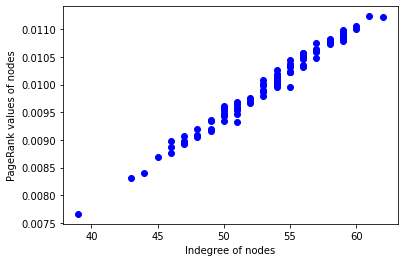

In [ ]:
def indeg_and_pr(g):
  indeg=dict(G.in_degree())
  print(indeg)
  pr=nx.pagerank(G)
  pr_values=[]
  for i in indeg:
    pr_values+=[pr[i]]
  print(indeg.values(),pr_values)
  plt.plot(list(indeg.values()),pr_values,'bo')
  plt.xlabel('Indegree of nodes')
  plt.ylabel('PageRank values of nodes')
  plt.show()

indeg_and_pr(G)

degree and page rank values are not corelated for ciatation network in the video.
(but not in the case above)